In [1]:
import os
import copy
import json
import numpy as np
import pandas as pd
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt
from datetime import datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, Select
from IPython.display import display, display_markdown, HTML

In [2]:
# Define init variable
INPUT_DATA_FN = "output_result.json"


In [3]:
# Result data handling

## load result data file
input_data_fp = os.path.join(os.getcwd(), INPUT_DATA_FN)
with open(input_data_fp) as read_fh:
    full_result_obj = json.load(read_fh)

# get preference name list
preference_name_list = full_result_obj.keys()
    

In [4]:
items_layout = Layout(width='auto')
items_style = {'description_width': 'initial'}
c_slider = Dropdown(layout=items_layout, style=items_style, options=["default"])
d_select = Dropdown(options=preference_name_list, layout=items_layout, style=items_style)


def update_c_range(*args):
    c_slider.options = full_result_obj[d_select.value].keys()

def view3(preference_name='',preference_value=''):
    DATA_LIST = 'time_list'
    DATA_NAME = 'run_time'
    DELETE_KEY = "video-recording-fps"
    HIDE_MISSING_CASE = False
    layout_row = 1
    layout_column = 1
    fig_size_w = 10
    fig_size_h = 5
    matplotlib.rcParams.update({'figure.max_open_warning': 0})

    data_dict = copy.deepcopy(full_result_obj[preference_name])
    for p_value in data_dict:
        if DELETE_KEY in data_dict[p_value]:
            data_dict[p_value].pop(DELETE_KEY)
    #
    # generate merged data
    #
    casename_list = list(set([casename for lable, data in data_dict.items() for casename in data.keys()]))

    case_result = []
    for casename in casename_list:
        result = {
            "casename": casename,
            "result": {}
        }
        for lable, data in data_dict.items():
            result["result"][lable] = {}

        for lable, data in data_dict.items():
            if data.get(casename):
                result["result"][lable][DATA_LIST] = data.get(casename).get(DATA_LIST)
            else:
                result["result"][lable][DATA_LIST] = []
        case_result.append(result)

    #
    # show original data of each cases
    #
    display_markdown('## Merged Result', raw=True)
    display_markdown('Report Generate Time: {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')), raw=True)
    display_markdown('{} Cases'.format(len(case_result)), raw=True)
    nightly_better_list = []
    for case in sorted(case_result):
        casename = case.get('casename')
        result = case.get('result')
        d = pd.DataFrame(result)

        # drop empty 'DATA_LIST'
        for c in d:
            if (d[c][DATA_LIST] == []) :
                d.drop(c, axis=1, inplace=True)

        # Retrive the value of 'DATA_NAME' from each run
        value = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME] for c in d]).T
        value.columns = d.columns

        # Plot input latency boxplot
        value_min = min(value.min())
        value_max = max(value.max())
        value_median = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME].median() for c in d]).T
        value_median.columns = d.columns

        # When HIDE_MISSING_CASE is enabled, skip the case if the case data less then input data amount.
        if HIDE_MISSING_CASE and len(INPUT_SOURCE) > len(value.T):
            # display summary
            display_markdown('### {}\nskip draw plot box'.format(casename), raw=True)
            display(value.describe())
        else:

            fig, ax = plt.subplots()
            ax.plot(list(range(1,len(list(value_median.median()))+1)), list(value_median.median()), "r:")

            value.plot.box(layout=(layout_row, layout_column),
                           sharey=True, sharex=True, figsize=(fig_size_w, fig_size_h),
                           ylim=(0, value_max*1.1), ax=ax)
            plt.title(casename)
            # display summary
            display_markdown('### {}'.format(casename), raw=True)
            display(value.describe())
    # show plot
    plt.show()
    


## Merged Result

Report Generate Time: 2017-11-06 16:32:15

29 Cases

### test_firefox_amazon_ail_hover_related_product_thumbnail

,1,50,default
count,10.000000,10.000000,10.000000
mean,422.222222,415.555556,433.333333
std,16.563466,17.529125,26.707787
min,400.000000,388.888889,400.000000
25%,411.111111,411.111111,416.666667
50%,422.222222,411.111111,433.333333
75%,433.333333,422.222222,441.666667
max,444.444444,455.555556,488.888889


### test_firefox_amazon_ail_select_search_suggestion

,1,50,default
count,10.000000,10.000000,10.000000
mean,7.222222,5.555556,7.222222
std,5.270463,0.000000,5.270463
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,5.555556,5.555556
max,22.222222,5.555556,22.222222


### test_firefox_amazon_ail_type_in_search_field

,1,50,default
count,10.000000,10.000000,10.000000
mean,11.666667,17.777778,16.111111
std,7.612891,5.737753,6.651217
min,5.555556,11.111111,5.555556
25%,5.555556,11.111111,11.111111
50%,8.333333,22.222222,16.666667
75%,19.444444,22.222222,22.222222
max,22.222222,22.222222,22.222222


### test_firefox_facebook_ail_click_close_chat_tab

,1,50,default
count,10.000000,10.000000,10.000000
mean,38.888889,56.666667,56.666667
std,18.332398,14.296488,29.373896
min,11.111111,22.222222,33.333333
25%,22.222222,55.555556,36.111111
50%,44.444444,61.111111,55.555556
75%,55.555556,66.666667,55.555556
max,55.555556,66.666667,133.333333


### test_firefox_facebook_ail_click_open_chat_tab

,1,50,default
count,10.000000,10.000000,10.000000
mean,74.444444,80.000000,73.333333
std,9.147473,17.213259,9.369712
min,66.666667,44.444444,66.666667
25%,66.666667,69.444444,66.666667
50%,72.222222,83.333333,66.666667
75%,77.777778,88.888889,77.777778
max,88.888889,100.000000,88.888889


### test_firefox_facebook_ail_click_open_chat_tab_emoji

,1,50,default
count,10.000000,10.000000,10.000000
mean,58.888889,57.777778,61.111111
std,10.540926,12.614360,15.044516
min,44.444444,44.444444,44.444444
25%,47.222222,44.444444,47.222222
50%,66.666667,61.111111,61.111111
75%,66.666667,66.666667,66.666667
max,66.666667,77.777778,88.888889


### test_firefox_facebook_ail_click_photo_viewer_right_arrow

,1,50,default
count,10.000000,10.000000,10.000000
mean,75.555556,77.777778,75.555556
std,10.210406,12.830006,8.764563
min,66.666667,66.666667,66.666667
25%,66.666667,66.666667,66.666667
50%,72.222222,72.222222,77.777778
75%,86.111111,88.888889,77.777778
max,88.888889,100.000000,88.888889


### test_firefox_facebook_ail_scroll_home_1_txt

,1,50,default
count,10.000000,10.000000,10.000000
mean,43.333333,45.555556,48.888889
std,6.307180,9.728834,5.737753
min,33.333333,33.333333,44.444444
25%,44.444444,36.111111,44.444444
50%,44.444444,44.444444,44.444444
75%,44.444444,55.555556,55.555556
max,55.555556,55.555556,55.555556


### test_firefox_facebook_ail_type_comment_1_txt

,1,50,default
count,10.000000,10.000000,10.000000
mean,37.777778,40.000000,41.111111
std,7.768954,11.944086,10.540926
min,33.333333,33.333333,33.333333
25%,33.333333,33.333333,33.333333
50%,33.333333,33.333333,33.333333
75%,41.666667,41.666667,52.777778
max,55.555556,66.666667,55.555556


### test_firefox_facebook_ail_type_composerbox_1_txt

,1,50,default
count,10.000000,10.000000,10.000000
mean,51.111111,32.222222,23.888889
std,19.737648,12.227833,19.253917
min,22.222222,11.111111,5.555556
25%,36.111111,25.000000,11.111111
50%,50.000000,33.333333,16.666667
75%,63.888889,33.333333,30.555556
max,88.888889,55.555556,66.666667


### test_firefox_facebook_ail_type_message_1_txt

,1,50,default
count,10.000000,10.000000,10.000000
mean,31.111111,20.555556,34.444444
std,18.555519,9.091065,21.880082
min,5.555556,5.555556,11.111111
25%,16.666667,13.888889,11.111111
50%,33.333333,22.222222,38.888889
75%,41.666667,22.222222,52.777778
max,55.555556,33.333333,66.666667


### test_firefox_gdoc_ail_pagedown_10_text

,1,50,default
count,10.000000,10.000000,10.000000
mean,61.111111,34.444444,57.777778
std,9.442629,3.513642,17.992530
min,44.444444,33.333333,11.111111
25%,58.333333,33.333333,58.333333
50%,66.666667,33.333333,66.666667
75%,66.666667,33.333333,66.666667
max,66.666667,44.444444,66.666667


### test_firefox_gdoc_ail_type_0

,1,50,default
count,10.000000,10.000000,10.000000
mean,83.333333,64.444444,88.888889
std,18.332398,8.764563,18.885257
min,66.666667,44.444444,66.666667
25%,66.666667,66.666667,69.444444
50%,77.777778,66.666667,94.444444
75%,100.000000,66.666667,100.000000
max,111.111111,77.777778,122.222222


### test_firefox_gmail_ail_compose_new_mail_via_keyboard

,1,50,default
count,10.000000,10.000000,10.000000
mean,233.333333,207.777778,251.111111
std,22.831163,13.907395,66.088024
min,200.000000,188.888889,211.111111
25%,216.666667,200.000000,222.222222
50%,233.333333,200.000000,227.777778
75%,241.666667,219.444444,252.777778
max,277.777778,233.333333,433.333333


### test_firefox_gmail_ail_open_mail

,1,50,default
count,10.000000,10.000000,10.000000
mean,246.666667,206.666667,243.333333
std,17.992530,21.722783,16.101530
min,211.111111,177.777778,222.222222
25%,236.111111,200.000000,233.333333
50%,244.444444,200.000000,238.888889
75%,263.888889,216.666667,252.777778
max,266.666667,255.555556,277.777778


### test_firefox_gmail_ail_reply_mail

,1,50,default
count,10.000000,10.000000,10.000000
mean,265.555556,224.444444,261.111111
std,37.203330,11.475506,12.001372
min,200.000000,200.000000,244.444444
25%,241.666667,222.222222,250.000000
50%,283.333333,227.777778,266.666667
75%,288.888889,233.333333,266.666667
max,300.000000,233.333333,277.777778


### test_firefox_gmail_ail_type_in_reply_field

,1,50,default
count,10.000000,10.000000,10.000000
mean,18.888889,16.111111,20.000000
std,7.499428,6.651217,7.027284
min,11.111111,5.555556,11.111111
25%,11.111111,11.111111,13.888889
50%,22.222222,16.666667,22.222222
75%,22.222222,22.222222,22.222222
max,33.333333,22.222222,33.333333


### test_firefox_gsearch_ail_select_image_cat

,1,50,default
count,10.000000,10.000000,10.000000
mean,117.777778,124.444444,133.333333
std,88.300522,97.118993,140.740741
min,77.777778,77.777778,77.777778
25%,77.777778,88.888889,88.888889
50%,94.444444,100.000000,88.888889
75%,100.000000,100.000000,97.222222
max,366.666667,400.000000,533.333333


### test_firefox_gsearch_ail_select_search_suggestion

,1,50,default
count,10.000000,10.000000,10.000000
mean,22.222222,25.555556,15.555556
std,10.475656,9.147473,7.314229
min,11.111111,11.111111,5.555556
25%,11.111111,22.222222,11.111111
50%,22.222222,27.777778,16.666667
75%,33.333333,33.333333,22.222222
max,33.333333,33.333333,22.222222


### test_firefox_gsearch_ail_type_searchbox

,1,50,default
count,10.000000,10.000000,10.000000
mean,5.555556,6.111111,7.222222
std,0.000000,1.756821,5.270463
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,5.555556,5.555556
max,5.555556,11.111111,22.222222


### test_firefox_gsheet_ail_type_0

,1,50,default
count,10.000000,10.000000,10.000000
mean,47.777778,53.333333,58.888889
std,12.883353,13.658584,16.604824
min,33.333333,33.333333,44.444444
25%,36.111111,47.222222,47.222222
50%,44.444444,55.555556,55.555556
75%,55.555556,55.555556,63.888889
max,66.666667,77.777778,100.000000


### test_firefox_gslide_ail_pagedown_0

,1,50,default
count,10.000000,10.000000,10.000000
mean,337.777778,351.111111,332.222222
std,13.042087,10.734353,8.198498
min,322.222222,333.333333,322.222222
25%,333.333333,344.444444,325.000000
50%,333.333333,350.000000,333.333333
75%,333.333333,355.555556,333.333333
max,366.666667,366.666667,344.444444


### test_firefox_gslide_ail_type_0

,50,default
count,10.000000,10.000000
mean,106.666667,100.000000
std,5.737753,13.857990
min,100.000000,88.888889
25%,100.000000,88.888889
50%,111.111111,100.000000
75%,111.111111,100.000000
max,111.111111,133.333333


### test_firefox_outlook_ail_composemail_0

,1,50,default
count,10.000000,10.000000,10.000000
mean,413.333333,396.666667,411.111111
std,27.616818,24.031301,17.371910
min,377.777778,355.555556,377.777778
25%,400.000000,383.333333,400.000000
50%,411.111111,400.000000,411.111111
75%,419.444444,408.333333,422.222222
max,477.777778,433.333333,433.333333


### test_firefox_outlook_ail_type_composemail_0

,1,50,default
count,10.000000,10.000000,10.000000
mean,18.333333,9.444444,241.111111
std,18.527775,6.953698,342.829748
min,5.555556,5.555556,11.111111
25%,11.111111,5.555556,22.222222
50%,11.111111,5.555556,33.333333
75%,11.111111,9.722222,550.000000
max,66.666667,22.222222,766.666667


### test_firefox_ymail_ail_compose_new_mail

,1,50,default
count,10.000000,10.000000,10.000000
mean,303.333333,282.222222,332.222222
std,60.869331,37.843081,108.922897
min,266.666667,244.444444,255.555556
25%,266.666667,255.555556,269.444444
50%,283.333333,277.777778,288.888889
75%,308.333333,297.222222,341.666667
max,466.666667,366.666667,611.111111


### test_firefox_ymail_ail_type_in_reply_field

,1,50,default
count,10.000000,10.000000,10.000000
mean,14.444444,25.000000,23.888889
std,9.868824,30.344388,20.629663
min,5.555556,5.555556,5.555556
25%,5.555556,6.944444,11.111111
50%,11.111111,11.111111,22.222222
75%,22.222222,22.222222,22.222222
max,33.333333,100.000000,77.777778


### test_firefox_youtube_ail_select_search_suggestion

,1,50,default
count,10.000000,10.000000,10.000000
mean,15.555556,15.555556,22.222222
std,8.996265,11.355341,5.237828
min,5.555556,5.555556,11.111111
25%,11.111111,5.555556,22.222222
50%,11.111111,11.111111,22.222222
75%,22.222222,22.222222,22.222222
max,33.333333,33.333333,33.333333


### test_firefox_youtube_ail_type_in_search_field

,1,50,default
count,10.000000,10.000000,10.000000
mean,7.777778,11.111111,20.000000
std,5.367177,9.442629,29.652769
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,11.111111,19.444444
max,22.222222,33.333333,100.000000


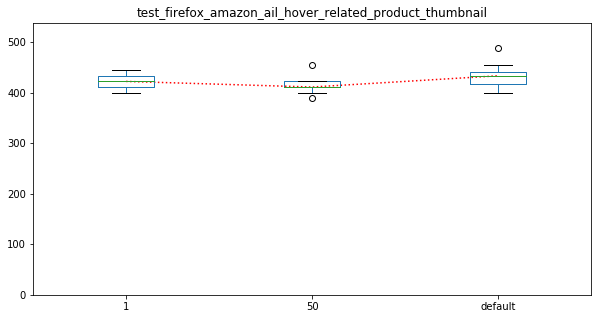

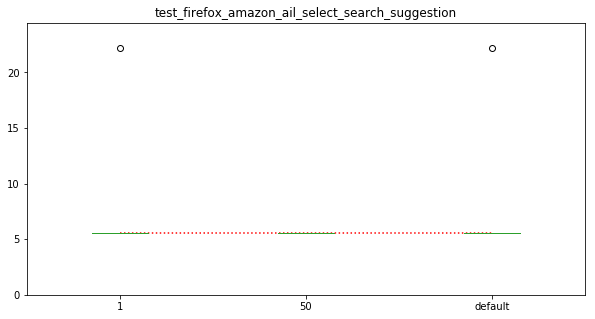

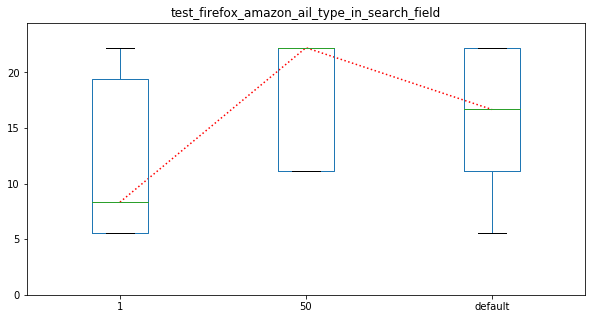

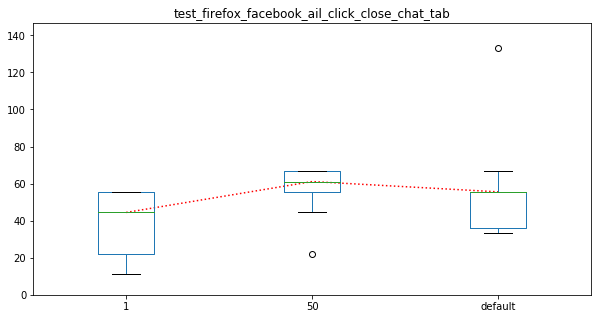

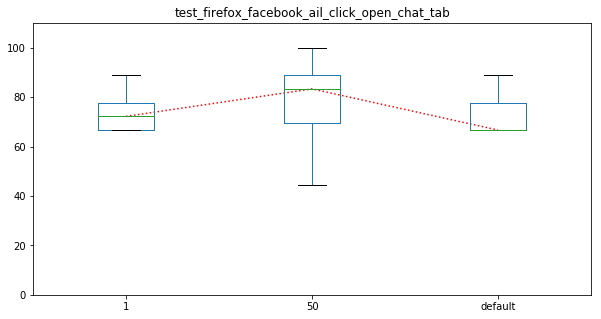

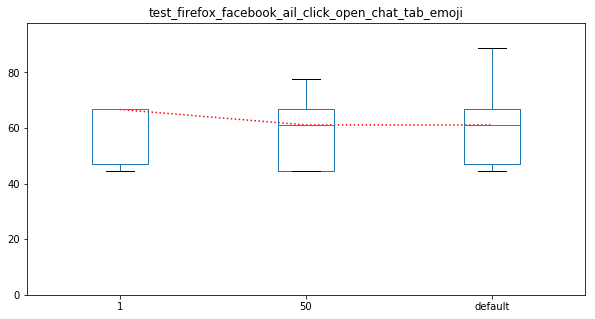

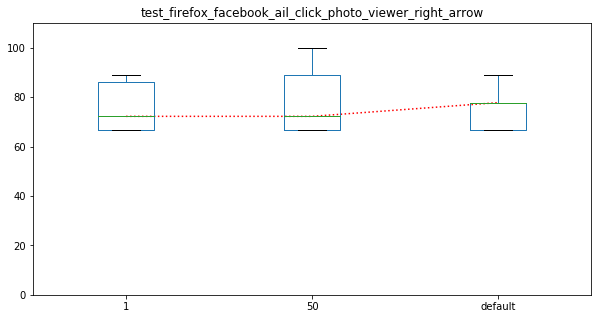

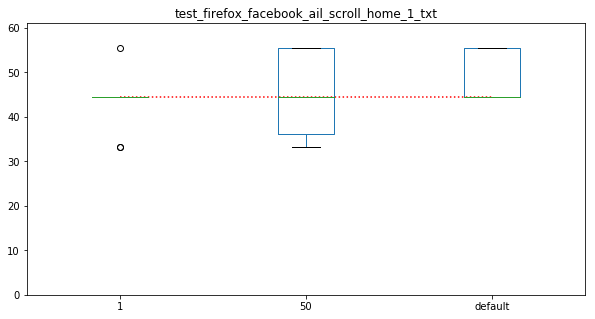

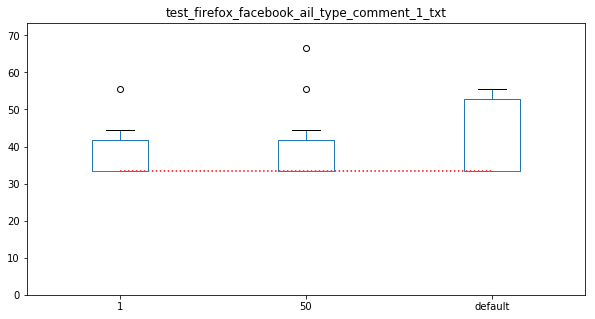

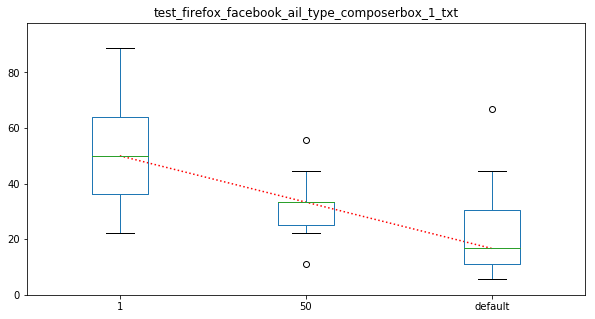

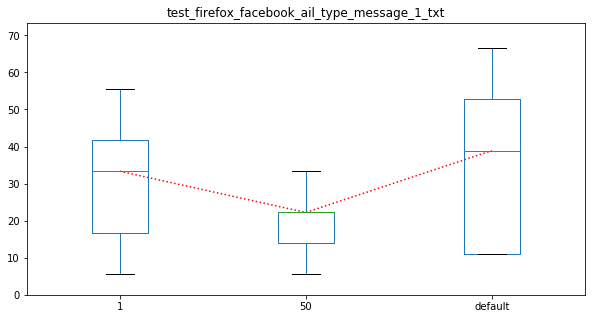

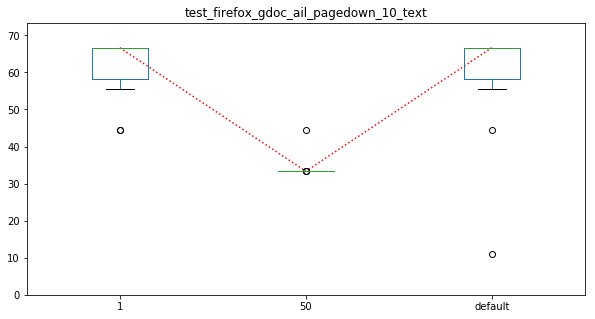

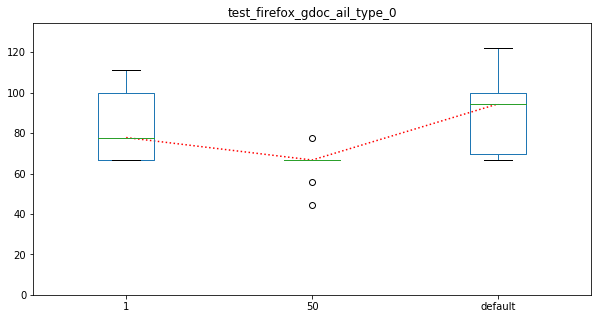

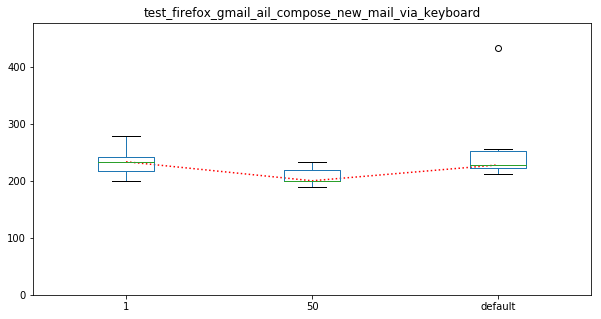

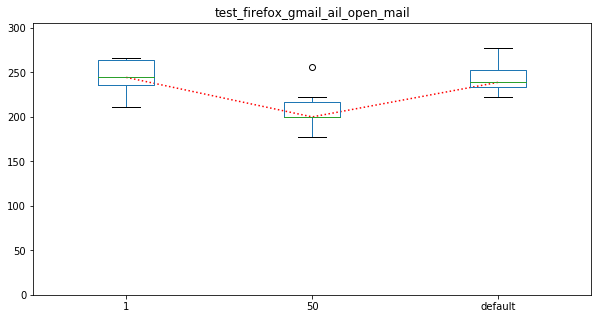

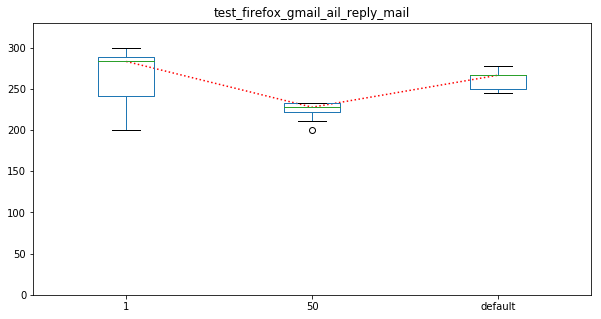

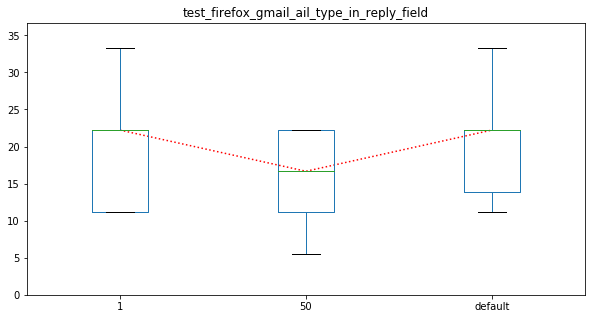

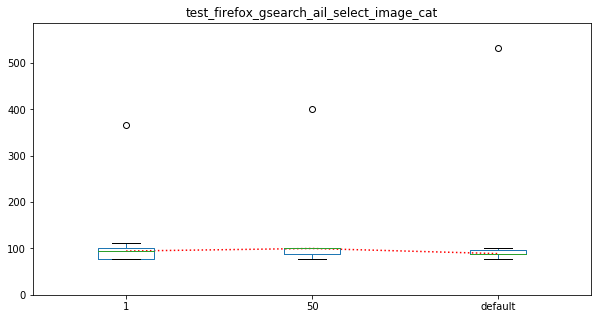

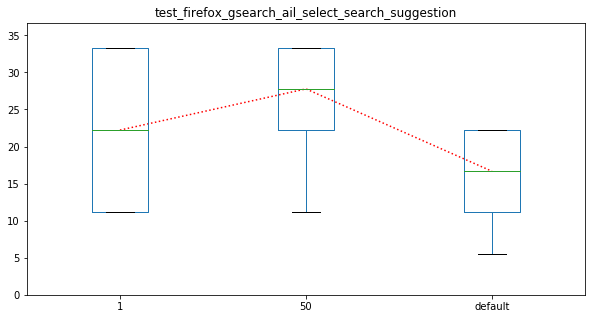

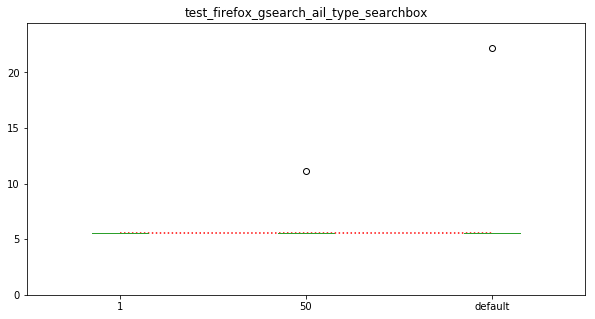

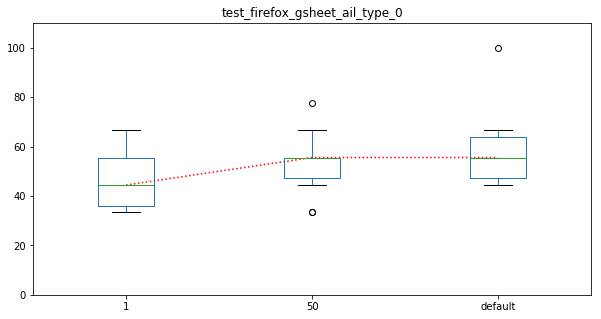

In [5]:
d_select.observe(update_c_range, 'value')
interactive_obj = interactive(view3, preference_value=c_slider,preference_name=d_select)
interactive_obj

